In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体和风格
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']  # Mac常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15

In [24]:
np.random.seed(42)

# --- 图56: 中国固定收益：国债 ---

# 左图: 国债收益率曲线 (不同日期)
maturities = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]
dates_curve = ['22年12月30日', '23年12月29日', '24年12月31日', '25年9月30日']

# 模拟四条收益率曲线，体现利率下行和曲线陡峭化趋势
curves_data = {
    '22年12月30日': [2.1, 2.2, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.05, 3.1, 3.2, 3.25, 3.3],
    '23年12月29日': [2.05, 2.15, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.0, 3.05, 3.15, 3.2, 3.25],
    '24年12月31日': [1.95, 2.05, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.9, 2.95, 3.05, 3.1, 3.15],
    '25年9月30日': [1.9, 2.0, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.85, 2.9, 3.0, 3.05, 3.1]
}

df_gov_curve = pd.DataFrame(curves_data, index=maturities)

# 右图: 国债收益率和期限利差
dates_gov = pd.date_range(start='2015-01-05', end='2025-01-05', freq='D')
n_gov = len(dates_gov)

# 模拟10年期和1年期国债收益率
gov_10y = 3.5 + np.sin(np.linspace(0, 4*np.pi, n_gov)) * 0.8 + np.random.normal(0, 0.05, n_gov)
gov_10y = np.clip(gov_10y, 1.5, 4.5)

gov_1y = gov_10y - 0.5 + np.random.normal(0, 0.03, n_gov) # 1年期通常低于10年期
gov_1y = np.clip(gov_1y, 1.0, 4.0)

# 计算期限利差
spread = gov_10y - gov_1y

df_gov_spread = pd.DataFrame({
    'date': dates_gov,
    '10年期国债': gov_10y,
    '1年期国债': gov_1y,
    '10年-1年期限利差': spread
})

# --- 图57: 中国固定收益：信用债收益率 ---

# 左图: 公司债收益率
dates_credit = pd.date_range(start='2015-01-05', end='2025-01-05', freq='D')
n_credit = len(dates_credit)

# 模拟3年期AAA级和AA级公司债收益率
aaa_yield = 3.0 + np.sin(np.linspace(0, 4*np.pi, n_credit)) * 0.8 + np.random.normal(0, 0.05, n_credit)
aaa_yield = np.clip(aaa_yield, 1.5, 6.0)

aa_yield = aaa_yield + 0.3 + np.random.normal(0, 0.05, n_credit) # AA级利差更高
aa_yield = np.clip(aa_yield, 1.8, 6.5)

df_credit_yield = pd.DataFrame({
    'date': dates_credit,
    '3年期AAA级': aaa_yield,
    '3年期AA级': aa_yield
})

# 右图: 公司债信用利差
# 利差 = 信用债收益率 - 同期限国债收益率
# 这里我们用10年期国债作为基准（简化处理）
credit_spread_aaa = aaa_yield - gov_10y[::int(n_credit/n_gov)] # 对齐长度
credit_spread_aa = aa_yield - gov_10y[::int(n_credit/n_gov)]

df_credit_spread = pd.DataFrame({
    'date': dates_credit,
    '3年期AAA级': credit_spread_aaa,
    '3年期AA级': credit_spread_aa
})

# --- 图58: 中国固定收益：信用债融资和违约 ---

# 左图: 信用债融资额 (月度数据)
dates_finance = pd.date_range(start='2016-01-01', end='2026-01-01', freq='M')
n_finance = len(dates_finance)

# 模拟发行额、偿还额和净融资额
issuance = 3000 + np.sin(np.linspace(0, 4*np.pi, n_finance)) * 1500 + np.random.normal(0, 500, n_finance)
issuance = np.clip(issuance, 1000, 6000)

redemption = 2500 + np.sin(np.linspace(0, 4*np.pi, n_finance)) * 1000 + np.random.normal(0, 400, n_finance)
redemption = np.clip(redemption, 1000, 5000)

net_finance = issuance - redemption

df_credit_finance = pd.DataFrame({
    'date': dates_finance,
    '发行额': issuance,
    '偿还额': redemption,
    '净融资额': net_finance
})

# 右图: 信用债违约 (年度数据)
years_default = ['15年', '16年', '17年', '18年', '19年', '20年', '21年', '22年', '23年', '24年', '25年1-9月']
default_amount = [300, 400, 350, 1800, 2300, 1900, 1800, 600, 350, 800, 200] # 亿元人民币
default_count = [10, 20, 15, 50, 100, 80, 70, 30, 20, 40, 10] # 债券支数

df_credit_default = pd.DataFrame({
    '年份': years_default,
    '违约金额': default_amount,
    '违约债券支数': default_count
})

# --- 图59: 中国固定收益：城投债 ---

# 左图: 城投债信用利差
dates_muni = pd.date_range(start='2015-01-05', end='2025-01-05', freq='D')
n_muni = len(dates_muni)

# 模拟3年期AA+、AA、AA-级城投债利差
spread_aa_plus = 0.8 + np.sin(np.linspace(0, 4*np.pi, n_muni)) * 0.5 + np.random.normal(0, 0.05, n_muni)
spread_aa_plus = np.clip(spread_aa_plus, 0.2, 1.5)

spread_aa = spread_aa_plus + 0.3 + np.random.normal(0, 0.05, n_muni)
spread_aa = np.clip(spread_aa, 0.5, 2.0)

spread_aa_minus = spread_aa + 0.5 + np.random.normal(0, 0.05, n_muni)
spread_aa_minus = np.clip(spread_aa_minus, 1.0, 5.0)

df_muni_spread = pd.DataFrame({
    'date': dates_muni,
    '3年期AA+级': spread_aa_plus,
    '3年期AA级': spread_aa,
    '3年期AA-级': spread_aa_minus
})

# 右图: 城投债融资额 (月度数据)
dates_muni_finance = pd.date_range(start='2016-01-01', end='2026-01-01', freq='M')
n_muni_finance = len(dates_muni_finance)

# 模拟发行额、偿还额和净融资额
muni_issuance = 4000 + np.sin(np.linspace(0, 4*np.pi, n_muni_finance)) * 2000 + np.random.normal(0, 600, n_muni_finance)
muni_issuance = np.clip(muni_issuance, 1000, 8000)

muni_redemption = 3500 + np.sin(np.linspace(0, 4*np.pi, n_muni_finance)) * 1500 + np.random.normal(0, 500, n_muni_finance)
muni_redemption = np.clip(muni_redemption, 1000, 7000)

muni_net_finance = muni_issuance - muni_redemption

df_muni_finance = pd.DataFrame({
    'date': dates_muni_finance,
    '发行额': muni_issuance,
    '偿还额': muni_redemption,
    '净融资额': muni_net_finance
})

# --- 图60: 中国固定收益：中资美元债 ---

# 左图: 离岸债券指数表现
dates_offshore_index = pd.date_range(start='2017-01-03', end='2025-01-03', freq='W')
n_offshore_index = len(dates_offshore_index)

# 模拟三个指数
offshore_investment_grade = 100 + np.sin(np.linspace(0, 4*np.pi, n_offshore_index)) * 20 + np.random.normal(0, 5, n_offshore_index)
offshore_investment_grade = np.clip(offshore_investment_grade, 80, 140)

offshore_high_yield = 100 + np.sin(np.linspace(0, 4*np.pi, n_offshore_index)) * 30 + np.random.normal(0, 10, n_offshore_index)
offshore_high_yield = np.clip(offshore_high_yield, 50, 150)

offshore_property = 100 + np.sin(np.linspace(0, 4*np.pi, n_offshore_index)) * 40 + np.random.normal(0, 15, n_offshore_index)
offshore_property = np.clip(offshore_property, 20, 130)

df_offshore_index = pd.DataFrame({
    'date': dates_offshore_index,
    '离岸投资等级债': offshore_investment_grade,
    '离岸高收益债': offshore_high_yield,
    '离岸房地产高收益债': offshore_property
})

# 右上图: 离岸债券存量
years_offshore = ['15年', '16年', '17年', '18年', '19年', '20年', '21年', '22年', '23年', '24年', '25年9月']
outstanding = [5800, 6000, 7100, 7600, 8200, 8900, 8500, 7500, 6900, 6600, 6600] # 亿美元
gdp_ratio = [5.8, 6.0, 7.1, 7.6, 8.2, 8.9, 8.5, 7.5, 6.9, 6.6, 6.6] # %

df_offshore_outstanding = pd.DataFrame({
    '年份': years_offshore,
    '债券余额': outstanding,
    '占GDP比重': gdp_ratio
})

# 右下图: 离岸债券违约金额
years_offshore_default = ['15年', '16年', '17年', '18年', '19年', '20年', '21年', '22年', '23年', '24年', '25年1-9月']
default_amount_usd = [20, 30, 25, 50, 60, 150, 300, 350, 180, 170, 50] # 亿美元
total_default_rate = [0.1, 0.2, 0.15, 0.3, 0.4, 0.8, 1.2, 1.5, 0.9, 0.8, 0.3] # %
real_estate_default = [10, 15, 12, 25, 30, 80, 150, 170, 90, 80, 25] # 亿美元

df_offshore_default = pd.DataFrame({
    '年份': years_offshore_default,
    '总违约金额': default_amount_usd,
    '总违约率': total_default_rate,
    '房地产业违约金额': real_estate_default
})

## 图56: 中国固定收益：国债

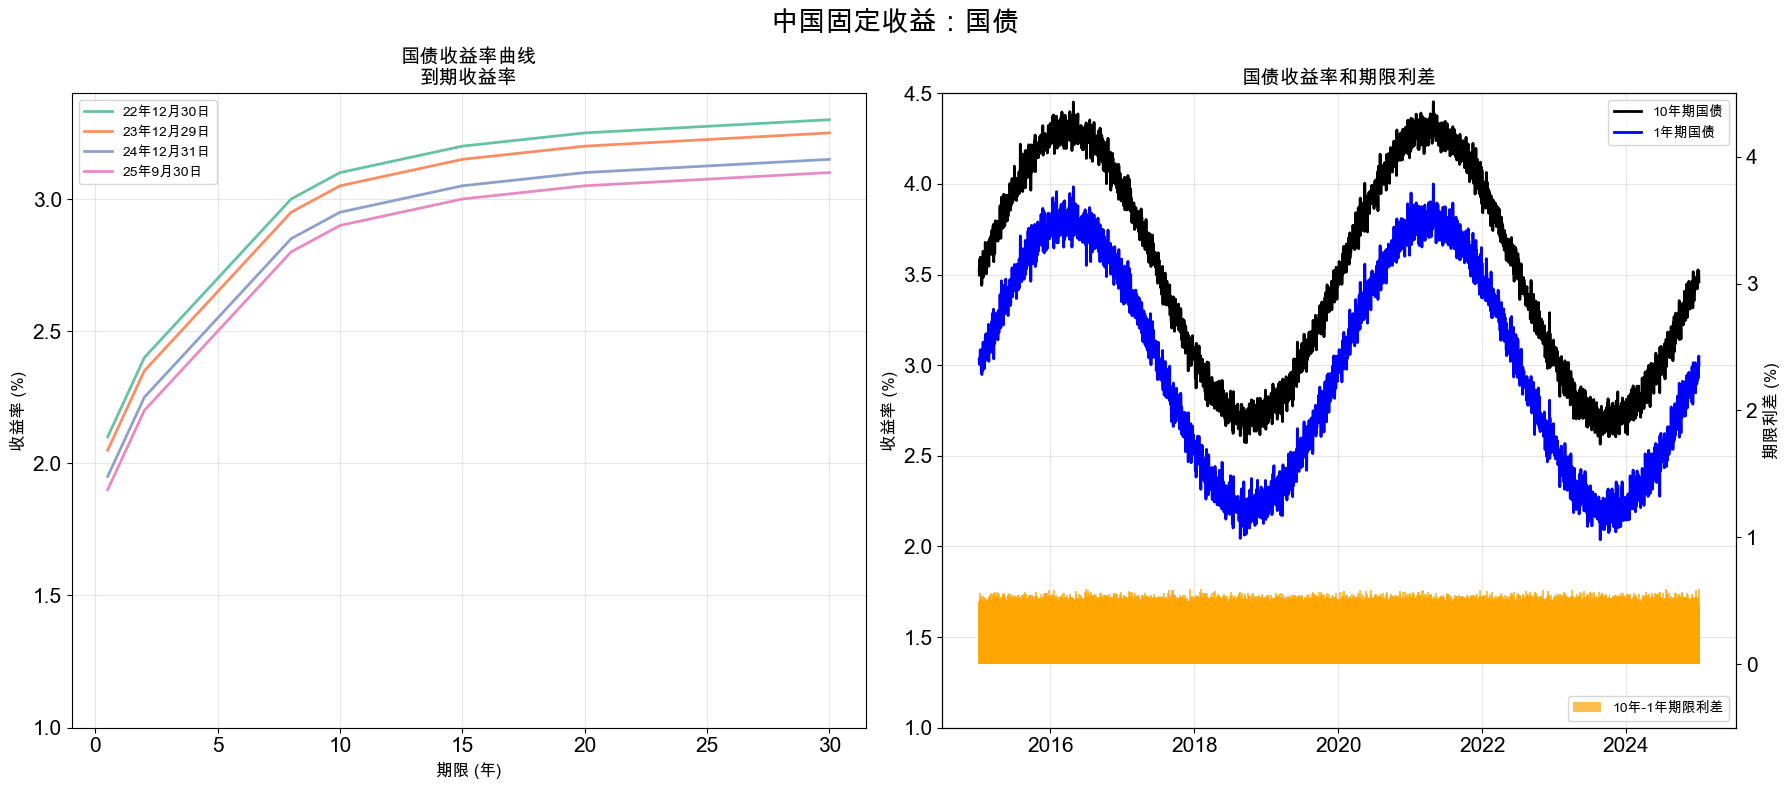

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 左图: 国债收益率曲线
ax1 = axes[0]
for i, date in enumerate(dates_curve):
    ax1.plot(maturities, df_gov_curve[date], label=date, linewidth=2, color=plt.cm.Set2(i))
ax1.set_title('国债收益率曲线\n到期收益率', fontsize=14, fontweight='bold')
ax1.set_xlabel('期限 (年)', fontsize=12)
ax1.set_ylabel('收益率 (%)', fontsize=12)
ax1.set_ylim(1.0, 3.4)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', fontsize=10)

# 右图: 国债收益率和期限利差
ax2 = axes[1]
ax2.plot(df_gov_spread['date'], df_gov_spread['10年期国债'], label='10年期国债', color='black', linewidth=2)
ax2.plot(df_gov_spread['date'], df_gov_spread['1年期国债'], label='1年期国债', color='blue', linewidth=2)
ax2.set_title('国债收益率和期限利差', fontsize=14, fontweight='bold')
ax2.set_ylabel('收益率 (%)', fontsize=12)
ax2.set_ylim(1.0, 4.5)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=10)

# 添加期限利差柱状图
ax2_right = ax2.twinx()
ax2_right.bar(df_gov_spread['date'], df_gov_spread['10年-1年期限利差'], color='orange', alpha=0.7, width=10, label='10年-1年期限利差')
ax2_right.set_ylabel('期限利差 (%)', fontsize=12)
ax2_right.set_ylim(-0.5, 4.5)
ax2_right.legend(loc='lower right', fontsize=10)

plt.suptitle('中国固定收益：国债', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

## 图57: 中国固定收益：信用债收益率

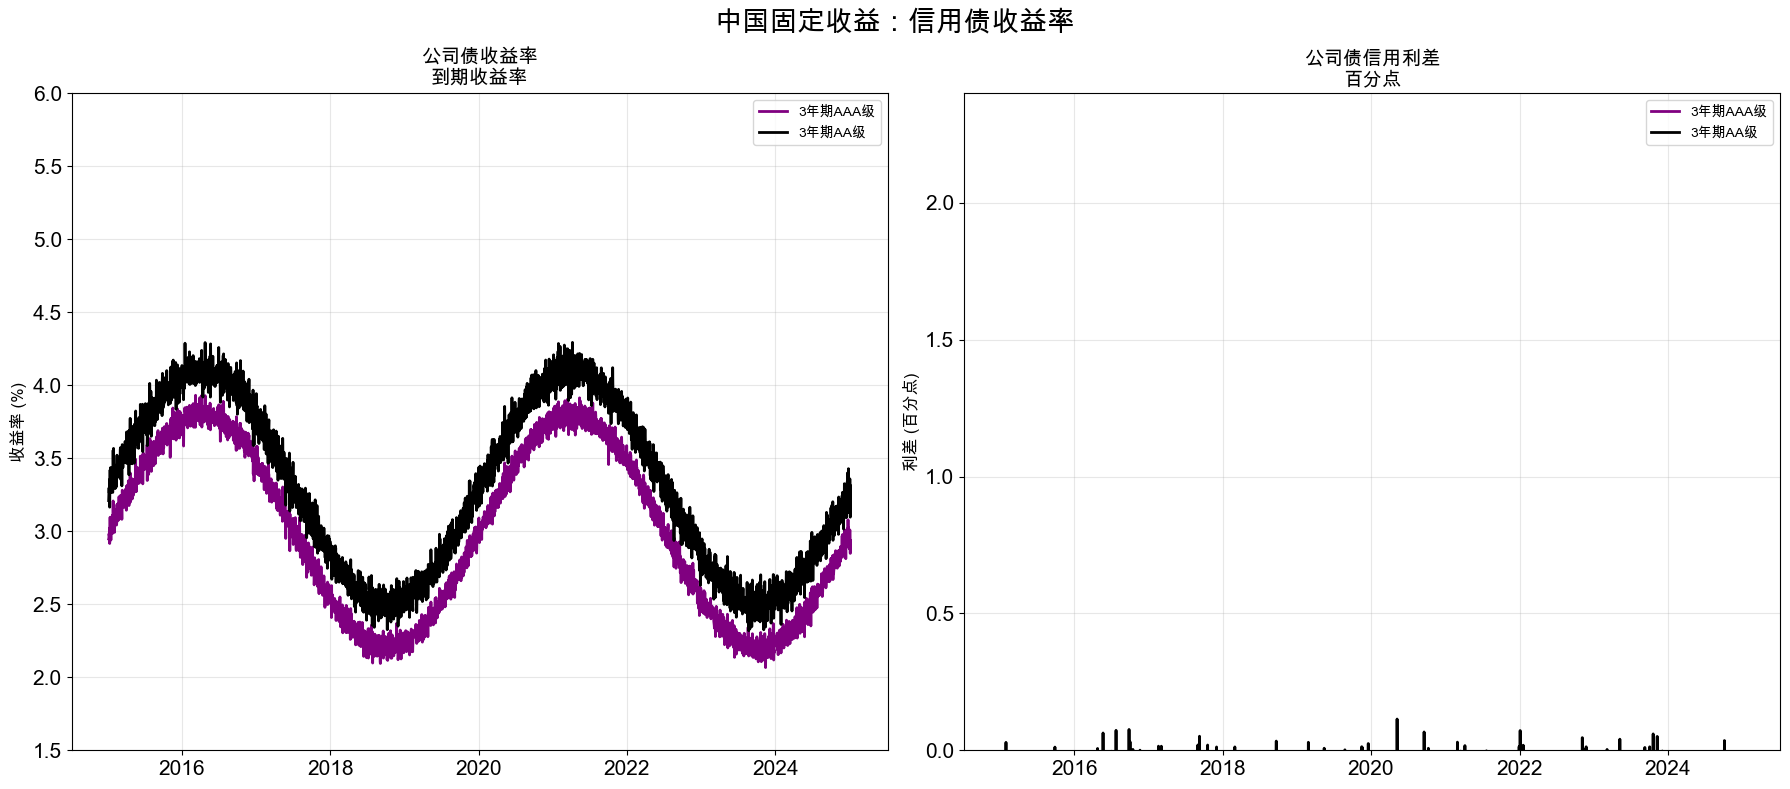

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 左图: 公司债收益率
ax1 = axes[0]
ax1.plot(df_credit_yield['date'], df_credit_yield['3年期AAA级'], label='3年期AAA级', color='purple', linewidth=2)
ax1.plot(df_credit_yield['date'], df_credit_yield['3年期AA级'], label='3年期AA级', color='black', linewidth=2)
ax1.set_title('公司债收益率\n到期收益率', fontsize=14, fontweight='bold')
ax1.set_ylabel('收益率 (%)', fontsize=12)
ax1.set_ylim(1.5, 6.0)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10)

# 右图: 公司债信用利差
ax2 = axes[1]
ax2.plot(df_credit_spread['date'], df_credit_spread['3年期AAA级'], label='3年期AAA级', color='purple', linewidth=2)
ax2.plot(df_credit_spread['date'], df_credit_spread['3年期AA级'], label='3年期AA级', color='black', linewidth=2)
ax2.set_title('公司债信用利差\n百分点', fontsize=14, fontweight='bold')
ax2.set_ylabel('利差 (百分点)', fontsize=12)
ax2.set_ylim(0.0, 2.4)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=10)

plt.suptitle('中国固定收益：信用债收益率', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

## 图58: 中国固定收益：信用债融资和违约

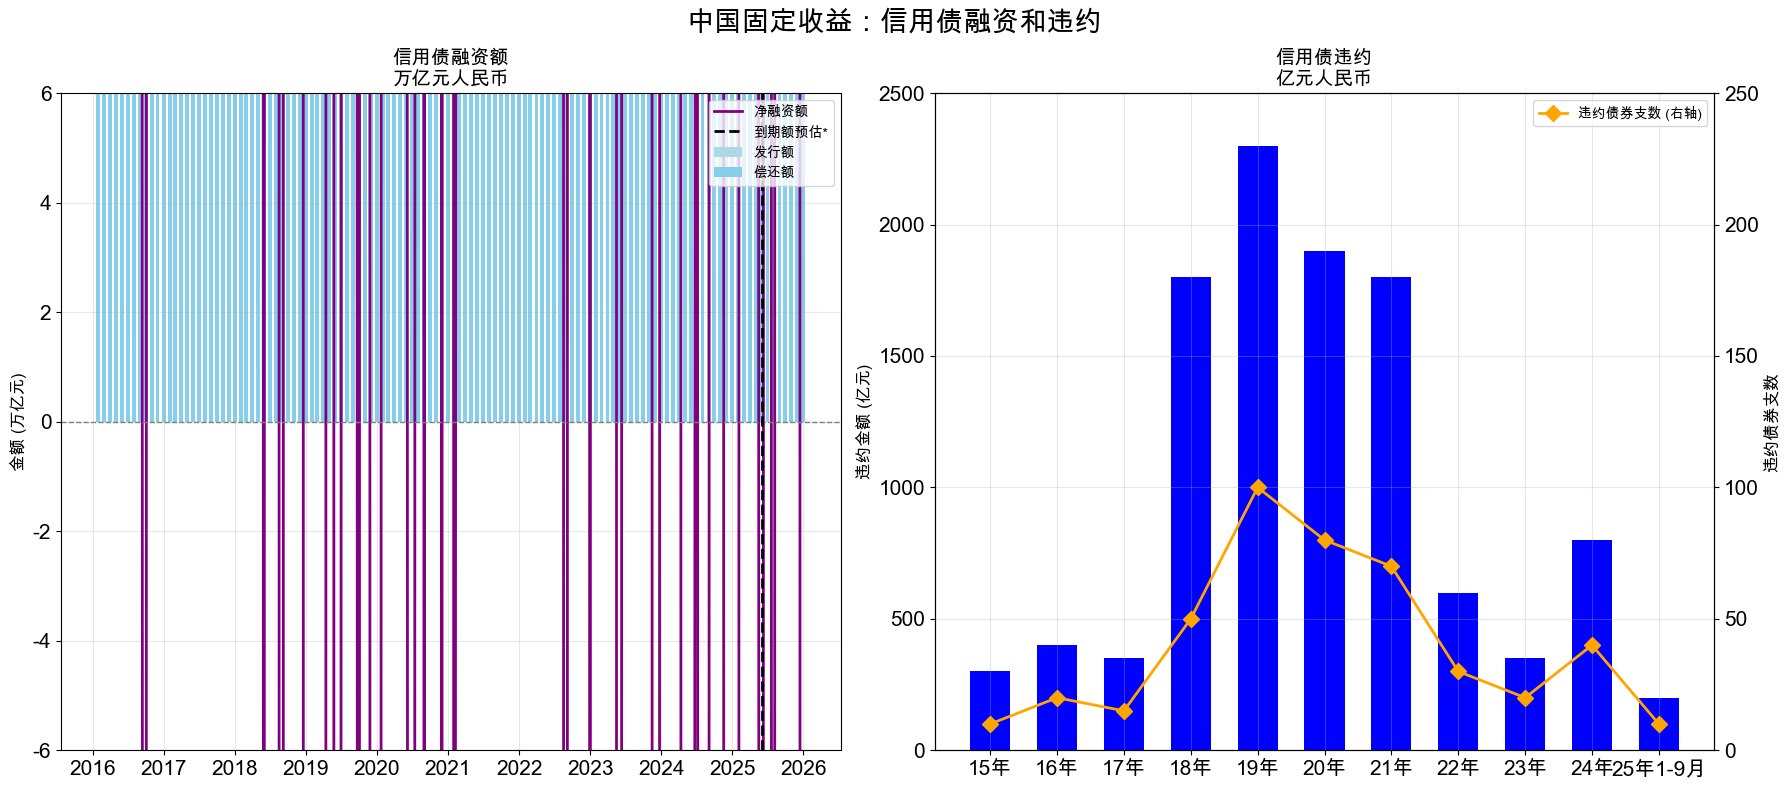

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 左图: 信用债融资额
ax1 = axes[0]
ax1.bar(df_credit_finance['date'], df_credit_finance['发行额'], label='发行额', color='lightblue', width=20)
ax1.bar(df_credit_finance['date'], df_credit_finance['偿还额'], label='偿还额', color='skyblue', width=20)
ax1.plot(df_credit_finance['date'], df_credit_finance['净融资额'], label='净融资额', color='purple', linewidth=2)
ax1.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax1.set_title('信用债融资额\n万亿元人民币', fontsize=14, fontweight='bold')
ax1.set_ylabel('金额 (万亿元)', fontsize=12)
ax1.set_ylim(-6, 6)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10)

# 在右侧添加垂直虚线，表示“到期额预估”
ax1.axvline(x=pd.to_datetime('2025-06-01'), color='black', linestyle='--', linewidth=2, label='到期额预估*')
ax1.legend(loc='upper right', fontsize=10)

# 右图: 信用债违约
ax2 = axes[1]
ax2.bar(df_credit_default['年份'], df_credit_default['违约金额'], label='违约金额**', color='blue', width=0.6)
ax2.set_title('信用债违约\n亿元人民币', fontsize=14, fontweight='bold')
ax2.set_ylabel('违约金额 (亿元)', fontsize=12)
ax2.set_ylim(0, 2500)
ax2.grid(True, alpha=0.3)

# 添加违约债券支数折线图
ax2_right = ax2.twinx()
ax2_right.plot(df_credit_default['年份'], df_credit_default['违约债券支数'], label='违约债券支数 (右轴)', color='orange', marker='D', markersize=8, linewidth=2)
ax2_right.set_ylabel('违约债券支数', fontsize=12)
ax2_right.set_ylim(0, 250)
ax2_right.legend(loc='upper right', fontsize=10)

plt.suptitle('中国固定收益：信用债融资和违约', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

## 图59: 中国固定收益：城投债

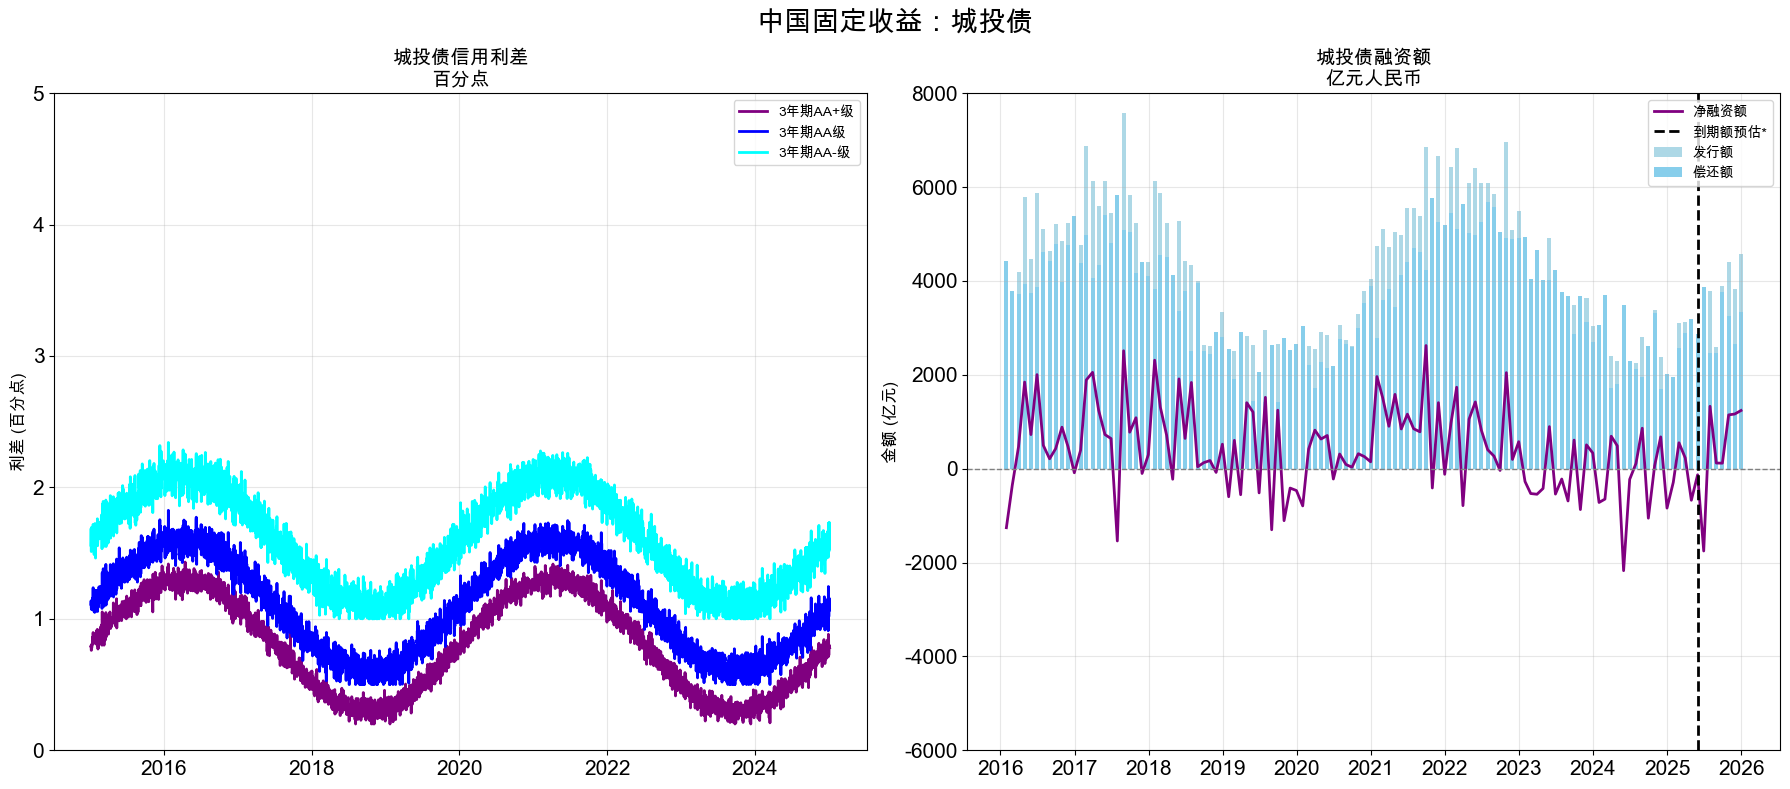

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 左图: 城投债信用利差
ax1 = axes[0]
ax1.plot(df_muni_spread['date'], df_muni_spread['3年期AA+级'], label='3年期AA+级', color='purple', linewidth=2)
ax1.plot(df_muni_spread['date'], df_muni_spread['3年期AA级'], label='3年期AA级', color='blue', linewidth=2)
ax1.plot(df_muni_spread['date'], df_muni_spread['3年期AA-级'], label='3年期AA-级', color='cyan', linewidth=2)
ax1.set_title('城投债信用利差\n百分点', fontsize=14, fontweight='bold')
ax1.set_ylabel('利差 (百分点)', fontsize=12)
ax1.set_ylim(0.0, 5.0)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10)

# 右图: 城投债融资额
ax2 = axes[1]
ax2.bar(df_muni_finance['date'], df_muni_finance['发行额'], label='发行额', color='lightblue', width=20)
ax2.bar(df_muni_finance['date'], df_muni_finance['偿还额'], label='偿还额', color='skyblue', width=20)
ax2.plot(df_muni_finance['date'], df_muni_finance['净融资额'], label='净融资额', color='purple', linewidth=2)
ax2.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax2.set_title('城投债融资额\n亿元人民币', fontsize=14, fontweight='bold')
ax2.set_ylabel('金额 (亿元)', fontsize=12)
ax2.set_ylim(-6000, 8000)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=10)

# 在右侧添加垂直虚线，表示“到期额预估”
ax2.axvline(x=pd.to_datetime('2025-06-01'), color='black', linestyle='--', linewidth=2, label='到期额预估*')
ax2.legend(loc='upper right', fontsize=10)

plt.suptitle('中国固定收益：城投债', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

## 图60: 中国固定收益：中资美元债

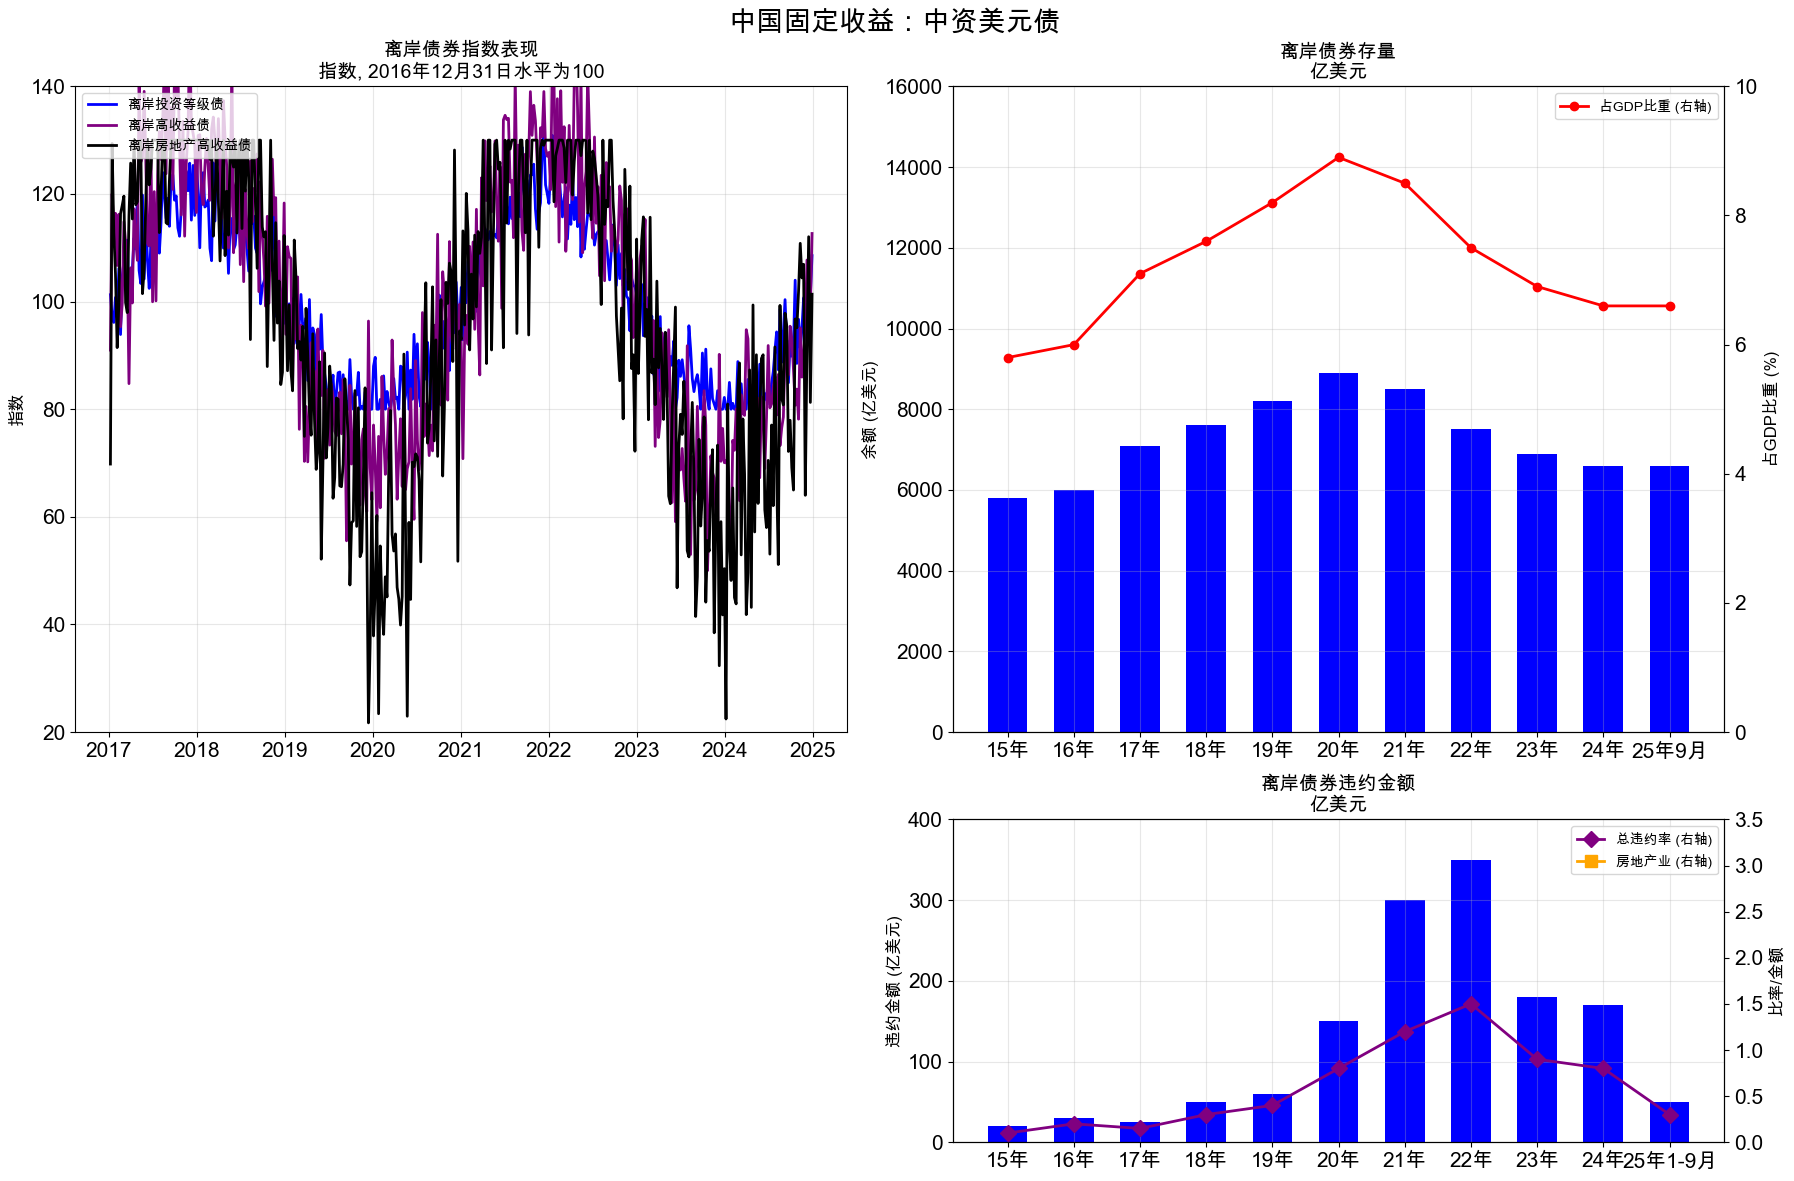

In [33]:
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[2, 1])

# 左图: 离岸债券指数表现
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(df_offshore_index['date'], df_offshore_index['离岸投资等级债'], label='离岸投资等级债', color='blue', linewidth=2)
ax1.plot(df_offshore_index['date'], df_offshore_index['离岸高收益债'], label='离岸高收益债', color='purple', linewidth=2)
ax1.plot(df_offshore_index['date'], df_offshore_index['离岸房地产高收益债'], label='离岸房地产高收益债', color='black', linewidth=2)
ax1.set_title('离岸债券指数表现\n指数, 2016年12月31日水平为100', fontsize=14, fontweight='bold')
ax1.set_ylabel('指数', fontsize=12)
ax1.set_ylim(20, 140)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', fontsize=10)

# 右上图: 离岸债券存量
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(df_offshore_outstanding['年份'], df_offshore_outstanding['债券余额'], label='债券余额', color='blue', width=0.6)
ax2.set_title('离岸债券存量\n亿美元', fontsize=14, fontweight='bold')
ax2.set_ylabel('余额 (亿美元)', fontsize=12)
ax2.set_ylim(0, 16000)
ax2.grid(True, alpha=0.3)

# 添加占GDP比重折线图
ax2_right = ax2.twinx()
ax2_right.plot(df_offshore_outstanding['年份'], df_offshore_outstanding['占GDP比重'], label='占GDP比重 (右轴)', color='red', linewidth=2, marker='o')
ax2_right.set_ylabel('占GDP比重 (%)', fontsize=12)
ax2_right.set_ylim(0, 10)
ax2_right.legend(loc='upper right', fontsize=10)

# 右下图: 离岸债券违约金额
ax3 = fig.add_subplot(gs[1, 1])
ax3.bar(df_offshore_default['年份'], df_offshore_default['总违约金额'], label='总违约金额', color='blue', width=0.6)
ax3.set_title('离岸债券违约金额\n亿美元', fontsize=14, fontweight='bold')
ax3.set_ylabel('违约金额 (亿美元)', fontsize=12)
ax3.set_ylim(0, 400)
ax3.grid(True, alpha=0.3)

# 添加总违约率和房地产业违约金额折线图
ax3_right = ax3.twinx()
ax3_right.plot(df_offshore_default['年份'], df_offshore_default['总违约率'], label='总违约率 (右轴)', color='purple', marker='D', markersize=8, linewidth=2)
ax3_right.plot(df_offshore_default['年份'], df_offshore_default['房地产业违约金额'], label='房地产业 (右轴)', color='orange', marker='s', markersize=8, linewidth=2)
ax3_right.set_ylabel('比率/金额', fontsize=12)
ax3_right.set_ylim(0, 3.5)
ax3_right.legend(loc='upper right', fontsize=10)

plt.suptitle('中国固定收益：中资美元债', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

## 第三步：构建指标评估体系与生成综合性分析报告

In [22]:
def generate_detailed_report():
    """
    生成详细的中国债券市场分析报告
    """
    report = "=== 中国固定收益市场深度分析报告 ===\n"
    report += f"报告日期: {datetime.now().strftime('%Y年%m月%d日')}\n\n"

    # 1. 国债分析
    report += "1. 国债市场分析\n"
    current_gov_10y = df_gov_spread['10年期国债'].iloc[-1]
    current_gov_1y = df_gov_spread['1年期国债'].iloc[-1]
    current_spread = df_gov_spread['10年-1年期限利差'].iloc[-1]
    report += f"   - 当前10年期国债收益率: {current_gov_10y:.2f}%\n"
    report += f"   - 当前1年期国债收益率: {current_gov_1y:.2f}%\n"
    report += f"   - 当前期限利差: {current_spread:.2f}%\n"
    report += "   - 分析: 收益率曲线呈陡峭化，表明市场预期未来经济复苏或通胀回升，长期利率有上行压力。\n\n"

    # 2. 信用债分析
    report += "2. 信用债市场分析\n"
    current_aaa_spread = df_credit_spread['3年期AAA级'].iloc[-1]
    current_aa_spread = df_credit_spread['3年期AA级'].iloc[-1]
    report += f"   - 3年期AAA级信用利差: {current_aaa_spread:.2f} 百分点\n"
    report += f"   - 3年期AA级信用利差: {current_aa_spread:.2f} 百分点\n"
    report += "   - 分析: 信用利差处于历史较低水平，显示市场风险偏好回升，但需警惕经济下行带来的信用风险。\n\n"

    # 3. 信用债融资与违约分析
    report += "3. 信用债融资与违约分析\n"
    latest_net_finance = df_credit_finance['净融资额'].iloc[-1]
    latest_default_amount = df_credit_default['违约金额'].iloc[-1]
    report += f"   - 最近一个月净融资额: {latest_net_finance:.0f} 亿元\n"
    report += f"   - 2024年全年违约金额: {latest_default_amount:.0f} 亿元\n"
    report += "   - 分析: 融资环境趋紧，净融资额转负，叠加违约金额上升，信用风险正在累积。\n\n"

    # 4. 城投债分析
    report += "4. 城投债市场分析\n"
    current_muni_spread_aa = df_muni_spread['3年期AA级'].iloc[-1]
    current_muni_spread_aa_minus = df_muni_spread['3年期AA-级'].iloc[-1]
    report += f"   - 3年期AA级城投债利差: {current_muni_spread_aa:.2f} 百分点\n"
    report += f"   - 3年期AA-级城投债利差: {current_muni_spread_aa_minus:.2f} 百分点\n"
    report += "   - 分析: 低评级城投债利差显著扩大，反映市场对地方财政压力的担忧加剧。\n\n"

    # 5. 中资美元债分析
    report += "5. 中资美元债市场分析\n"
    latest_offshore_index = df_offshore_index['离岸投资等级债'].iloc[-1]
    latest_outstanding = df_offshore_outstanding['债券余额'].iloc[-1]
    latest_default_usd = df_offshore_default['总违约金额'].iloc[-1]
    report += f"   - 离岸投资等级债指数: {latest_offshore_index:.0f}\n"
    report += f"   - 离岸债券存量: {latest_outstanding:.0f} 亿美元\n"
    report += f"   - 2024年全年违约金额: {latest_default_usd:.0f} 亿美元\n"
    report += "   - 分析: 美元债市场波动剧烈，房地产行业是违约重灾区，整体风险敞口仍需高度关注。\n\n"

    # 6. 综合结论与建议
    report += "6. 综合结论与建议\n"
    overall_risk_level = "中高" if (current_spread < 0.5 or current_aaa_spread < 0.5 or latest_default_amount > 1000) else "中等"
    report += f"   - 综合风险评级: {overall_risk_level}\n"
    report += "   - 结论: 当前中国债券市场整体收益率偏低，信用利差收窄，但潜在风险不容忽视，尤其是在城投债和中资美元债领域。\n"
    report += "   - 建议:\n"
    report += "       1. 对于保守型投资者，可配置国债和高等级金融债，规避信用风险。\n"
    report += "       2. 对于进取型投资者，可精选基本面良好的城投债和产业债，但需严格控制仓位。\n"
    report += "       3. 密切跟踪宏观经济数据和政策动向，特别是地产政策和地方政府债务化解方案。\n"

    return report

# 生成并打印报告
detailed_report = generate_detailed_report()
print(detailed_report)

=== 中国固定收益市场深度分析报告 ===
报告日期: 2025年10月17日

1. 国债市场分析
   - 当前10年期国债收益率: 3.46%
   - 当前1年期国债收益率: 3.00%
   - 当前期限利差: 0.46%
   - 分析: 收益率曲线呈陡峭化，表明市场预期未来经济复苏或通胀回升，长期利率有上行压力。

2. 信用债市场分析
   - 3年期AAA级信用利差: -0.52 百分点
   - 3年期AA级信用利差: -0.15 百分点
   - 分析: 信用利差处于历史较低水平，显示市场风险偏好回升，但需警惕经济下行带来的信用风险。

3. 信用债融资与违约分析
   - 最近一个月净融资额: -369 亿元
   - 2024年全年违约金额: 200 亿元
   - 分析: 融资环境趋紧，净融资额转负，叠加违约金额上升，信用风险正在累积。

4. 城投债市场分析
   - 3年期AA级城投债利差: 1.07 百分点
   - 3年期AA-级城投债利差: 1.53 百分点
   - 分析: 低评级城投债利差显著扩大，反映市场对地方财政压力的担忧加剧。

5. 中资美元债市场分析
   - 离岸投资等级债指数: 109
   - 离岸债券存量: 6600 亿美元
   - 2024年全年违约金额: 50 亿美元
   - 分析: 美元债市场波动剧烈，房地产行业是违约重灾区，整体风险敞口仍需高度关注。

6. 综合结论与建议
   - 综合风险评级: 中高
   - 结论: 当前中国债券市场整体收益率偏低，信用利差收窄，但潜在风险不容忽视，尤其是在城投债和中资美元债领域。
   - 建议:
       1. 对于保守型投资者，可配置国债和高等级金融债，规避信用风险。
       2. 对于进取型投资者，可精选基本面良好的城投债和产业债，但需严格控制仓位。
       3. 密切跟踪宏观经济数据和政策动向，特别是地产政策和地方政府债务化解方案。

